In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matricesAleatorias import matwishart as ws

In [3]:
Nmat = 1000
Tmat = 10000
matmat = ws.MatrizWishart((Nmat,Tmat))
densidadmat = ws.Densidades((Nmat,Tmat),1000,1)

In [7]:
WOE = matmat.WOE() #Se crea la matriz de wishart

In [37]:
x, y = densidadmat.MarchenkoPastur()

In [9]:
EvalsWOE = np.linalg.eigvalsh(WOE)

In [11]:
rWOEmat = (EvalsWOE[1:-1] - EvalsWOE[2:]) / (EvalsWOE[:-2] - EvalsWOE[1:-1])

In [15]:
rmat = np.linspace(0,10,1000)
prmat = densidadmat.Pr(rmat)

In [19]:
nsamp = 100000
Nens = 100
Tens = 1000
ens = ws.MatrizWishart((Nens,Tens))
Eval = []

In [21]:
for i in range(nsamp):
    WOE = ens.WOE()
    eval = np.linalg.eigvalsh(WOE)
    Eval.append(eval)

In [23]:
Eval = np.concatenate(Eval)

In [25]:
rens = []

In [29]:
for i in range(int(nsamp / Nens)):
    EvalSamp = Eval[0 + i*100:100 + i*100]
    rsamp = (EvalSamp[1:-1] - EvalSamp[2:]) / (EvalSamp[:-2] - EvalSamp[1:-1])
    rens.append(rsamp)

In [31]:
rens = np.concatenate(rens)

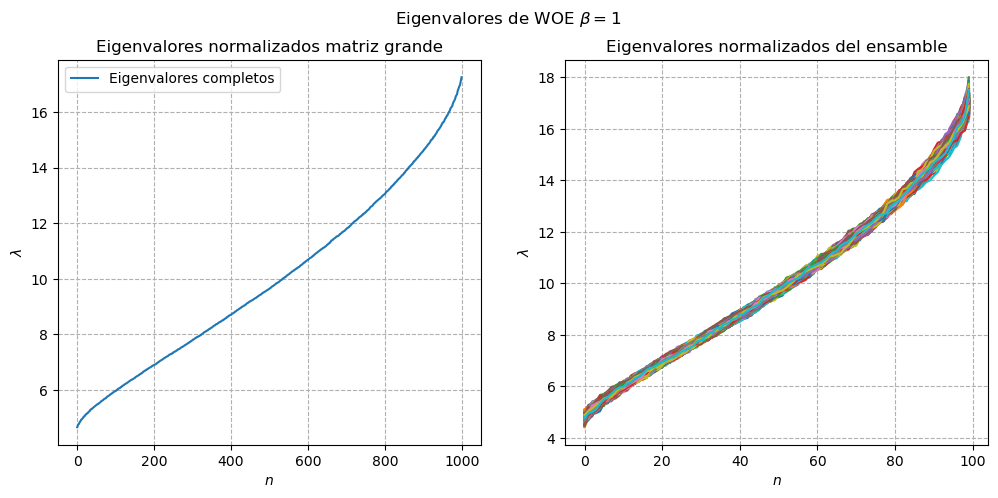

In [35]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Eigenvalores de WOE $ \beta=1 $')

ax[0].plot(EvalsWOE,label='Eigenvalores completos')
ax[0].set_title('Eigenvalores normalizados matriz grande')
ax[0].grid(True,linestyle='--')
ax[0].legend()
ax[0].set_xlabel(r'$ n $')
ax[0].set_ylabel(r'$ \lambda $')

for i in range(int(nsamp/Nens)):
    ax[1].plot(Eval[0+i*100:100 + i*100])
ax[1].set_title('Eigenvalores normalizados del ensamble')
ax[1].grid(True,linestyle='--')
ax[1].set_xlabel(r'$ n $')
ax[1].set_ylabel(r'$ \lambda $')

plt.savefig('EigenvaloresWOE.png',dpi=300)

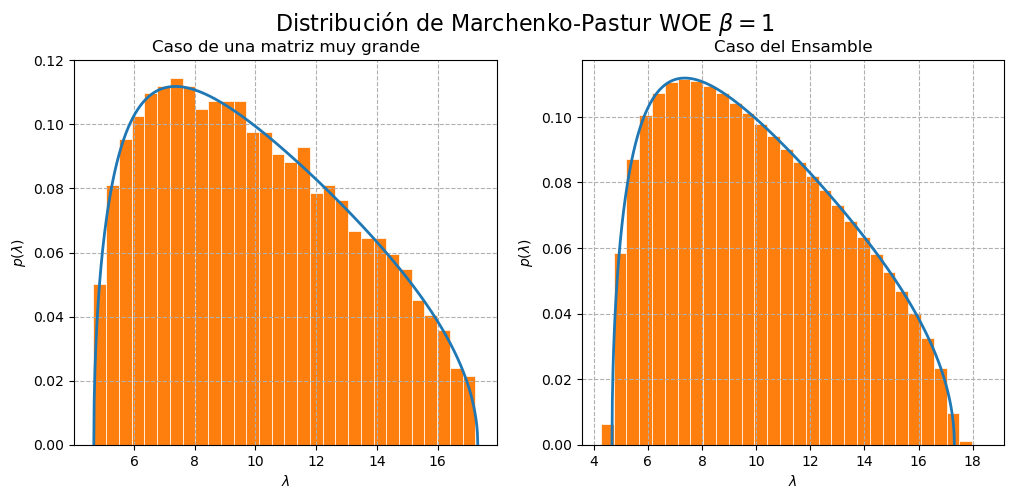

In [39]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

fig.suptitle(r'Distribución de Marchenko-Pastur WOE $ \beta=1 $',fontsize=16)

ax[0].plot(x,y,lw=2)
ax[0].hist(EvalsWOE,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ \lambda $')
ax[0].set_ylabel(r'$ p(\lambda) $')

ax[1].plot(x,y,lw=2)
ax[1].hist(Eval,bins=30,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ \lambda $')
ax[1].set_ylabel(r'$ p(\lambda) $')

plt.savefig('Marchenko-PasturWOE.png',dpi=300)

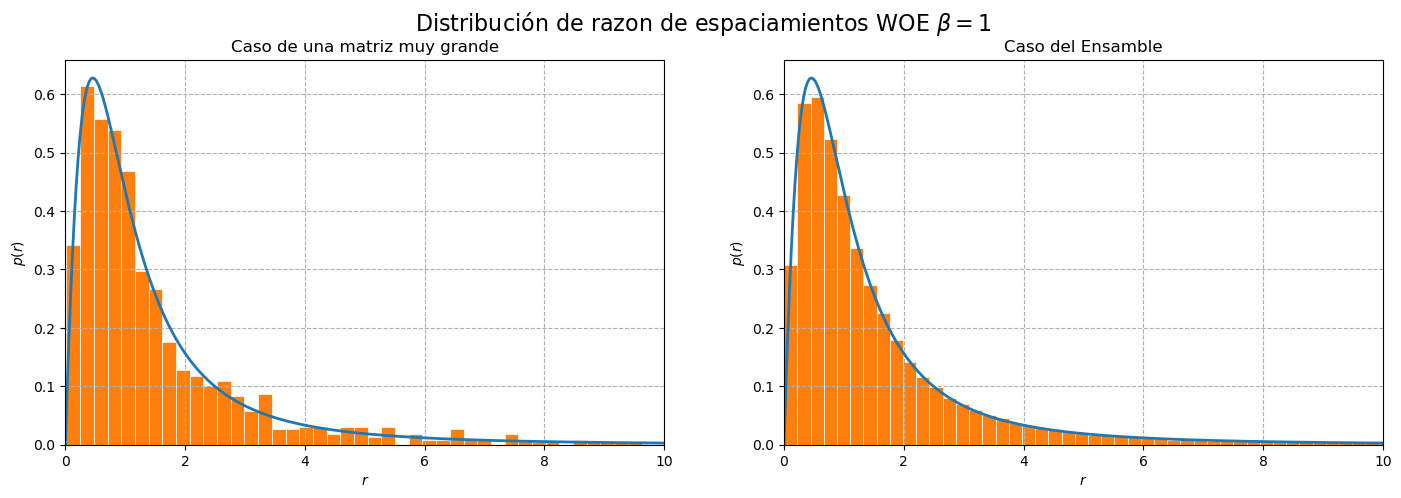

In [53]:
fig, ax = plt.subplots(1,2,figsize=(17,5))

fig.suptitle(r'Distribución de razon de espaciamientos WOE $ \beta=1 $',fontsize=16)

ax[0].plot(rmat,prmat,lw=2)
ax[0].hist(rWOEmat,bins=300,density=True,linewidth=0.5,edgecolor='white')
ax[0].grid(True,linestyle='--')
ax[0].set_title('Caso de una matriz muy grande')
ax[0].set_xlabel(r'$ r $')
ax[0].set_ylabel(r'$ p(r) $')
ax[0].set_xlim(0,10)

ax[1].plot(rmat,prmat,lw=2)
ax[1].hist(rens,bins=3000,density=True,linewidth=0.5,edgecolor='white')
ax[1].grid(True,linestyle='--')
ax[1].set_title('Caso del Ensamble')
ax[1].set_xlabel(r'$ r $')
ax[1].set_ylabel(r'$ p(r) $')
ax[1].set_xlim(0,10)

plt.savefig('prWOE.png',dpi=300)